In [24]:
import numpy as np
import pandas as pd
from pathlib import Path
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import gc
from matplotlib import pyplot as plt

In [2]:
rootdir = Path().resolve().parent
cachedir = rootdir / "data" / "cache" / "df"

In [3]:
import sys
sys.path.append(str(rootdir))
import src.utils.data as data
import src.markets.lagfeaturesharpratio as markets

In [4]:
NUM_DIVIDE = 5
MINUTES = "1min"
NUM_TAIN_ENV_STEPS = 288
N_LAG = 15

In [5]:
df, features = data.load_bybit_data(
    num_divide=NUM_DIVIDE,
    interval=MINUTES,
)

['StochasticOscillator_stoch_1',
 'StochRSIIndicator_stoch_rsi_k_1',
 'StochRSIIndicator_stoch_rsi_d_2',
 'DonchianChannel_dcp_2',
 'DonchianChannel_dcw_1',
 'PercentagePriceOscillator_ppo_2',
 'PercentagePriceOscillator_ppo_hist_2',
 'PercentagePriceOscillator_ppo_signal_1',
 'VortexIndicator_vortex_ind_diff_2',
 'StochRSIIndicator_stoch_rsi_k_2',
 'MACD_macd_diff_2',
 'KSTIndicator_kst_2',
 'EaseOfMovementIndicator_em_2',
 'ChaikinMoneyFlowIndicator_cmf_1',
 'ROCIndicator_roc_2',
 'KSTIndicator_kst_diff_2',
 'MFIIndicator_mfi_1',
 'UlcerIndex_ui_1',
 'KSTIndicator_kst_sig_2',
 'CCIIndicator_cci_1',
 'WilliamsRIndicator_wr_2',
 'DPOIndicator_dpo_1',
 'AroonIndicator_aroon_up_1',
 'BollingerBands_bbli_2',
 'MassIndex_mass_index_2',
 'KeltnerChannel_kcp_1',
 'KeltnerChannel_kcw_2',
 'PercentagePriceOscillator_ppo_hist_1',
 'MFIIndicator_mfi_2',
 'PercentageVolumeOscillator_pvo_2',
 'UlcerIndex_ui_2',
 'ROCIndicator_roc_1',
 'BollingerBands_bbp_2',
 'KeltnerChannel_kchi_1',
 'AwesomeOsci

In [9]:
df1 = df.loc[df["fold"] == (0)].reset_index(drop=True)
df2 = df.loc[df["fold"] == (4)].reset_index(drop=True)

df1["label"], df2["label"] = 0, 1
df = pd.concat([df1, df2], axis=0).reset_index(drop=True)

del df1, df2
gc.collect()

0

In [10]:
df

,timestamp,close,high,low,volume,buy_price,sell_price,open,ChaikinMoneyFlowIndicator_cmf_1,ChaikinMoneyFlowIndicator_cmf_2,...,AroonIndicator_aroon_ind_1,AroonIndicator_aroon_up_2,AroonIndicator_aroon_down_2,AroonIndicator_aroon_ind_2,PSARIndicator_psar_up_indicator_1,PSARIndicator_psar_down_indicator_1,PSARIndicator_psar_up_indicator_2,PSARIndicator_psar_down_indicator_2,fold,label
0,1609426860,28396,28396,28383,1760629,28396,28383,28383.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0
1,1609426920,28425,28425,28396,4834091,28425,28396,28396.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0
2,1609426980,28488,28488,28425,6020970,28488,28425,28425.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0
3,1609427040,28490,28490,28485,1990660,28490,28485,28488.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0
4,1609427100,28499,28500,28490,1316782,28500,28490,28490.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71994,1620226500,56899,56989,56877,10481140,56989,56877,56935.0,0.306347,0.096017,...,0.454545,0.444444,-0.222222,0.277778,0.0,0.0,0.0,0.0,4.0,1
71995,1620226560,56877,56900,56877,4344062,56900,56877,56899.0,0.278547,0.147521,...,0.431818,0.333333,-0.333333,0.277778,0.0,0.0,0.0,0.0,4.0,1
71996,1620226620,56837,56878,56837,3429258,56878,56837,56877.0,0.273085,0.158139,...,0.409091,0.222222,-0.444444,0.277778,0.0,1.0,0.0,0.0,4.0,1
71997,1620226680,57075,57099,56830,17354043,57099,56830,56837.0,0.337845,0.269961,...,0.386364,0.555556,-0.444444,0.444444,1.0,0.0,0.0,0.0,4.0,1


In [21]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score


def train_lgb(df, cols: list[str]):
    train_ds = lgb.Dataset(df[cols], label=df["label"])
    
    model = lgb.train(
        params, 
        train_ds, 
        valid_sets=[train_ds], 
        feval=feval_acc,
        callbacks=[
            lgb.log_evaluation(100)
        ]
    )
    train_score = accuracy_score(
        df["label"].values, 
        (model.predict(df[cols].values) > 0.5).astype(int)
    )
    return model, train_score
    
    
def feval_acc(preds, data):
    y_true = data.get_label()
    y_pred = (preds > 0.5).astype(int)
    acc = accuracy_score(y_true, y_pred)
    return "accuracy", acc, True

params = {
    "objective": "binary",
    "verbosity": -1
}

In [61]:
dfimp = []
for f in df.columns[8:-2]:
    model, score = train_lgb(df, cols=[f])
    dfimp.append([f, score])
dfimp = pd.DataFrame(dfimp, columns=["name", "score"])
dfimp

[100]	training's binary_logloss: 0.68525	training's accuracy: 0.544285
[100]	training's binary_logloss: 0.682036	training's accuracy: 0.551133
[100]	training's binary_logloss: 0.647651	training's accuracy: 0.614745
[100]	training's binary_logloss: 0.663822	training's accuracy: 0.600397
[100]	training's binary_logloss: 0.647651	training's accuracy: 0.614745
[100]	training's binary_logloss: 0.664391	training's accuracy: 0.597356
[100]	training's binary_logloss: 0.689336	training's accuracy: 0.531521
[100]	training's binary_logloss: 0.68344	training's accuracy: 0.553383
[100]	training's binary_logloss: 0.577012	training's accuracy: 0.698051
[100]	training's binary_logloss: 0.691109	training's accuracy: 0.52548
[100]	training's binary_logloss: 0.693147	training's accuracy: 0.500201
[100]	training's binary_logloss: 0.693144	training's accuracy: 0.500563
[100]	training's binary_logloss: 0.586798	training's accuracy: 0.689885
[100]	training's binary_logloss: 0.691096	training's accuracy: 0.52

,name,score
0,ChaikinMoneyFlowIndicator_cmf_1,0.544285
1,ChaikinMoneyFlowIndicator_cmf_2,0.551133
2,EaseOfMovementIndicator_em_1,0.614745
3,EaseOfMovementIndicator_sma_em_1,0.600397
4,EaseOfMovementIndicator_em_2,0.614745
...,...,...
96,AroonIndicator_aroon_ind_2,0.520049
97,PSARIndicator_psar_up_indicator_1,0.502132
98,PSARIndicator_psar_down_indicator_1,0.502132
99,PSARIndicator_psar_up_indicator_2,0.501215


In [62]:
features1 = dfimp.loc[dfimp["score"] <= 0.55, "name"].values
model, score = train_lgb(df, cols=features1)

[100]	training's binary_logloss: 0.554224	training's accuracy: 0.725288


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

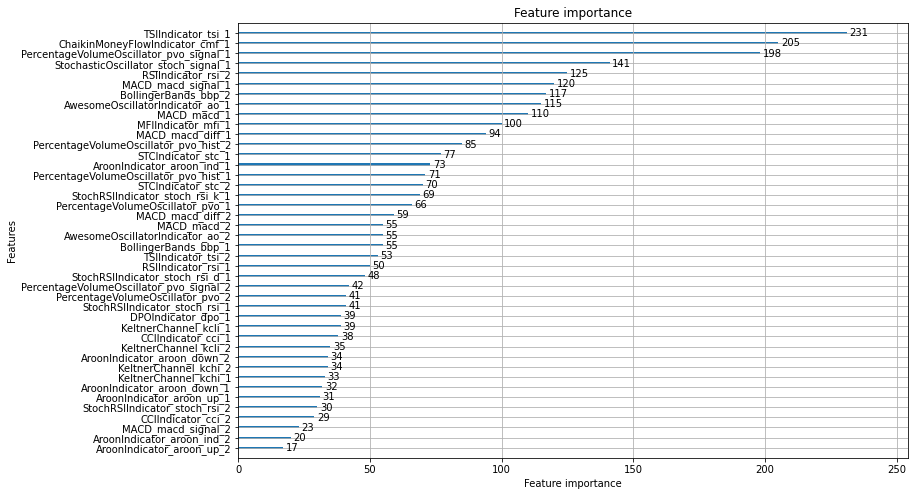

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
lgb.plot_importance(model, ax=ax)

In [64]:
dfimp = pd.DataFrame({"name": model.feature_name(), "value": model.feature_importance()})
dfimp.sort_values("value")

,name,value
49,PSARIndicator_psar_down_indicator_2,0
48,PSARIndicator_psar_up_indicator_2,0
47,PSARIndicator_psar_down_indicator_1,0
7,BollingerBands_bbli_2,0
6,BollingerBands_bbhi_2,0
46,PSARIndicator_psar_up_indicator_1,0
4,BollingerBands_bbli_1,0
3,BollingerBands_bbhi_1,0
43,AroonIndicator_aroon_up_2,17
45,AroonIndicator_aroon_ind_2,20


In [73]:
ignore_features = [
    "TSIIndicator", 
    "ChaikinMoneyFlowIndicator", 
    "PercentageVolumeOscillator",
    "StochasticOscillator",
    "RSIIndicator",
    "MACD",
    "BollingerBands",
]

features2 = []
for f in features1:
    for igf in ignore_features:
        if igf in f:
            break
    else:
        features2.append(f)
        
model, score = train_lgb(df, cols=features2)

[100]	training's binary_logloss: 0.613397	training's accuracy: 0.663245


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

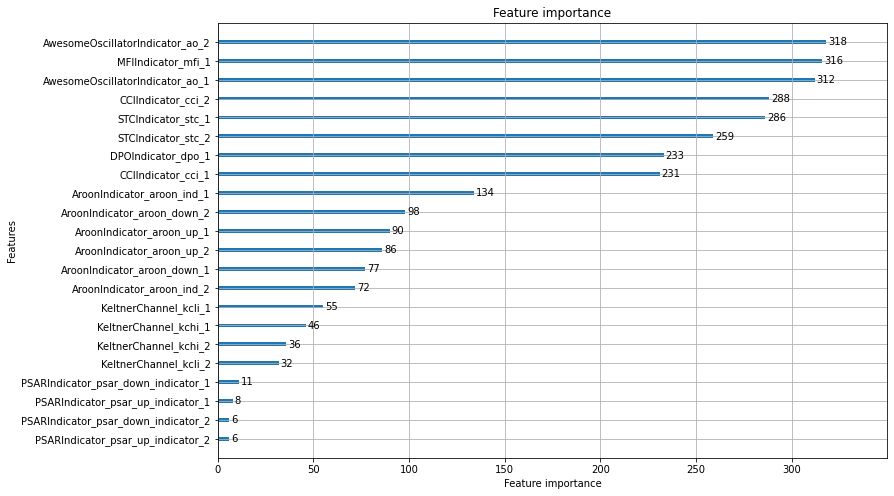

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
lgb.plot_importance(model, ax=ax)

In [75]:
dfimp = pd.DataFrame({"name": model.feature_name(), "value": model.feature_importance()})
dfimp.sort_values("value")

,name,value
21,PSARIndicator_psar_down_indicator_2,6
20,PSARIndicator_psar_up_indicator_2,6
18,PSARIndicator_psar_up_indicator_1,8
19,PSARIndicator_psar_down_indicator_1,11
4,KeltnerChannel_kcli_2,32
3,KeltnerChannel_kchi_2,36
1,KeltnerChannel_kchi_1,46
2,KeltnerChannel_kcli_1,55
17,AroonIndicator_aroon_ind_2,72
13,AroonIndicator_aroon_down_1,77
